What does R-squared represent in a regression model? 
R-squared measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, with higher values indicating a better fit.


What are the assumptions of linear regression? The key assumptions are:
Linearity: The relationship between the independent and dependent variables is linear.
Independence: Observations are independent of each other.
Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
Normality: The residuals are normally distributed.
No multicollinearity: Independent variables are not highly correlated with each other.



What is the difference between R-squared and Adjusted R-squared? 
Adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It provides a more accurate measure of the model's goodness of fit, especially when comparing models with different numbers of predictors.


Why do we use Mean Squared Error (MSE)? 
MSE measures the average squared difference between observed and predicted values. It penalizes larger errors more than smaller ones, making it useful for assessing the accuracy of a regression model.


What does an Adjusted R-squared value of 0.85 indicate? 
It indicates that 85% of the variance in the dependent variable is explained by the independent variables in the model, adjusted for the number of predictors.


How do we check for normality of residuals in linear regression? 
WE can use graphical methods like Q-Q plots, histograms, or statistical tests like the Shapiro-Wilk test to check for normality.


What is multicollinearity, and how does it impact regression? 
Multicollinearity occurs when independent variables are highly correlated with each other. It can lead to unstable estimates of coefficients and make it difficult to determine the individual effect of each predictor.


What is Mean Absolute Error (MAE)? 
MAE measures the average absolute difference between observed and predicted values. It is less sensitive to outliers compared to MSE.


What are the benefits of using an ML pipeline? 
ML pipelines automate the workflow of machine learning tasks, ensuring consistency, reducing errors, and improving efficiency by streamlining data preprocessing, model training, and evaluation.


Why is RMSE considered more interpretable than MSE? 
RMSE (Root Mean Squared Error) is in the same units as the dependent variable, making it easier to interpret and compare to actual observed values.


What is pickling in Python, and how is it useful in ML? 
Pickling is the process of serializing and saving Python objects (like models) to a file. It allows you to save trained models and reuse them later without retraining.


What does a high R-squared value mean?
A high R-squared value indicates that a large proportion of the variance in the dependent variable is explained by the independent variables, suggesting a good fit.



What happens if linear regression assumptions are violated? 
Violations can lead to biased estimates, incorrect inferences, and poor predictive performance. It is important to check and address any assumption violations.


How can we address multicollinearity in regression? 
We can use techniques like removing highly correlated predictors, combining correlated predictors into a single variable, or using regularization methods like Ridge or Lasso regression.


How can feature selection improve model performance in regression analysis? 
Feature selection removes irrelevant or redundant predictors, reducing overfitting, improving model interpretability, and enhancing predictive accuracy.


How is Adjusted R-squared calculated? 
Adjusted R-squared is calculated by adjusting the R-squared value based on the number of predictors and the sample size, penalizing the addition of unnecessary predictors.


Why is MSE sensitive to outliers? 
MSE squares the errors, giving more weight to larger errors. This makes it more sensitive to outliers, which can disproportionately affect the overall error.



What is the role of homoscedasticity in linear regression? 
Homoscedasticity ensures that the variance of the errors is constant across all levels of the independent variables. This is important for valid standard errors, confidence intervals, and hypothesis tests.


What is Root Mean Squared Error (RMSE)? 
RMSE is the square root of the average squared differences between observed and predicted values. It provides a measure of the model's prediction accuracy in the same units as the dependent variable.


Why is pickling considered risky? 
Pickling can be risky because it involves executing arbitrary code during deserialization, which can pose security risks if the source of the pickle file is untrusted.


What alternatives exist to pickling for saving ML models? 
Alternatives include using formats like JSON for saving model parameters, or using libraries like Joblib, HDF5, and ONNX for saving and loading models more securely.


What is heteroscedasticity, and why is it a problem? 
Heteroscedasticity refers to non-constant variance of errors in a regression model. It can lead to inefficient estimates, biased standard errors, and unreliable statistical inferences.



How can interaction terms enhance a regression model's predictive power? 
Interaction terms capture the combined effects of two or more variables, revealing hidden patterns and improving model fit by accounting for synergistic effects.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
df=sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [5]:
df.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [6]:
df.cut=df.cut.map({"Ideal":4,"Premium":5,"Good":2,"Very Good":3,"Fair":1})


In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.color.unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [9]:
df=df.drop(columns=["color","clarity"])
df

,carat,cut,depth,table,price,x,y,z
0,0.23,4,61.5,55.0,326,3.95,3.98,2.43
1,0.21,5,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...
53935,0.72,4,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,5,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   carat   53940 non-null  float64 
 1   cut     53940 non-null  category
 2   depth   53940 non-null  float64 
 3   table   53940 non-null  float64 
 4   price   53940 non-null  int64   
 5   x       53940 non-null  float64 
 6   y       53940 non-null  float64 
 7   z       53940 non-null  float64 
dtypes: category(1), float64(6), int64(1)
memory usage: 2.9 MB


In [11]:
df.cut=df.cut.astype("float")


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   cut     53940 non-null  float64
 2   depth   53940 non-null  float64
 3   table   53940 non-null  float64
 4   price   53940 non-null  int64  
 5   x       53940 non-null  float64
 6   y       53940 non-null  float64
 7   z       53940 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 3.3 MB


In [13]:
X=df.drop(columns="price")
X

,carat,cut,depth,table,x,y,z
0,0.23,4.0,61.5,55.0,3.95,3.98,2.43
1,0.21,5.0,59.8,61.0,3.89,3.84,2.31
2,0.23,2.0,56.9,65.0,4.05,4.07,2.31
3,0.29,5.0,62.4,58.0,4.20,4.23,2.63
4,0.31,2.0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,4.0,60.8,57.0,5.75,5.76,3.50
53936,0.72,2.0,63.1,55.0,5.69,5.75,3.61
53937,0.70,3.0,62.8,60.0,5.66,5.68,3.56
53938,0.86,5.0,61.0,58.0,6.15,6.12,3.74


In [14]:
y=df[["price"]]
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model

LinearRegression()

In [17]:
model.fit(X_train,y_train)

LinearRegression()

In [18]:
y_predict=model.predict(X_test)
y_predict

array([[ 782.17529537],
       [6970.19767032],
       [2528.56500017],
       ...,
       [ 574.16111623],
       [ 515.15854232],
       [4969.69341407]])

In [19]:
error=y_test-y_predict
error

,price
2714,-218.175295
14653,-1056.197670
52760,33.435000
48658,190.049378
14812,-1150.887834
...,...
35532,-277.323479
3464,-710.309021
32702,227.838884
34439,348.841458


<Axes: ylabel='Count'>

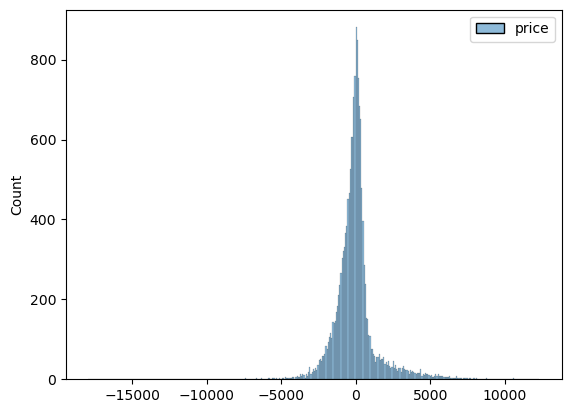

In [20]:
#1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model 
#using Seaborn's "diamonds" dataset.
sns.histplot(error)

In [21]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root 
#Mean Squared Error (RMSE) for a linear regression model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [22]:
mean_squared_error(y_test,y_predict)

2118820.546177092

In [23]:
mean_absolute_error(y_test,y_predict)

883.4433533608159

In [24]:
r2_score(y_test,y_predict)

0.8618744435799913

3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check 
linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

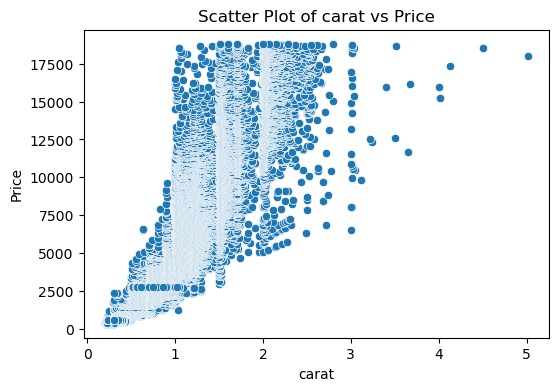

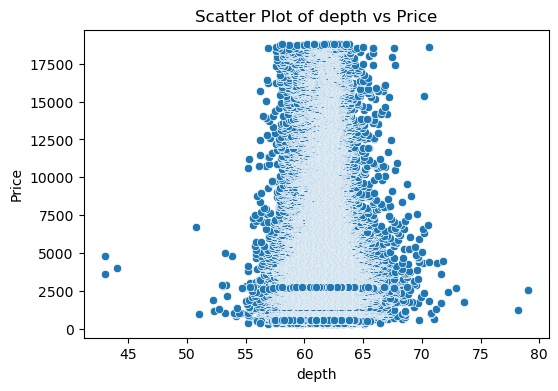

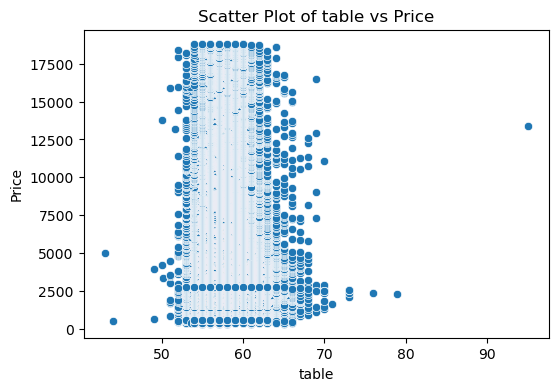

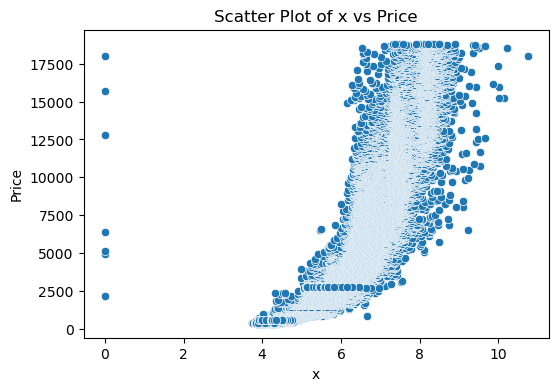

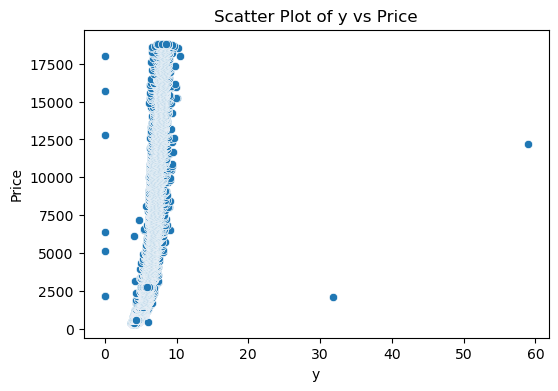

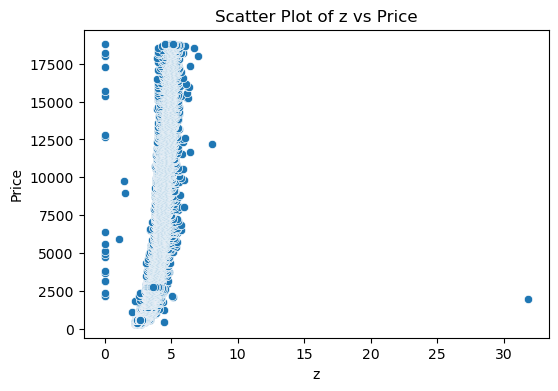

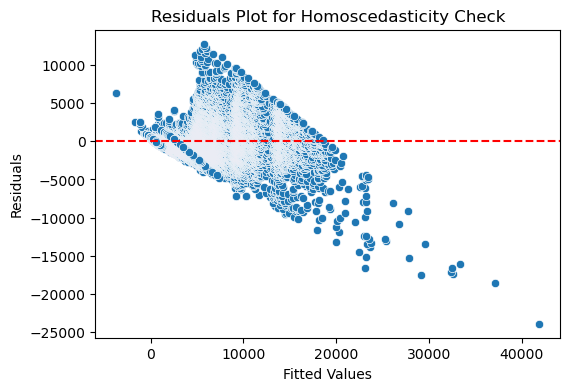

<Figure size 800x600 with 0 Axes>

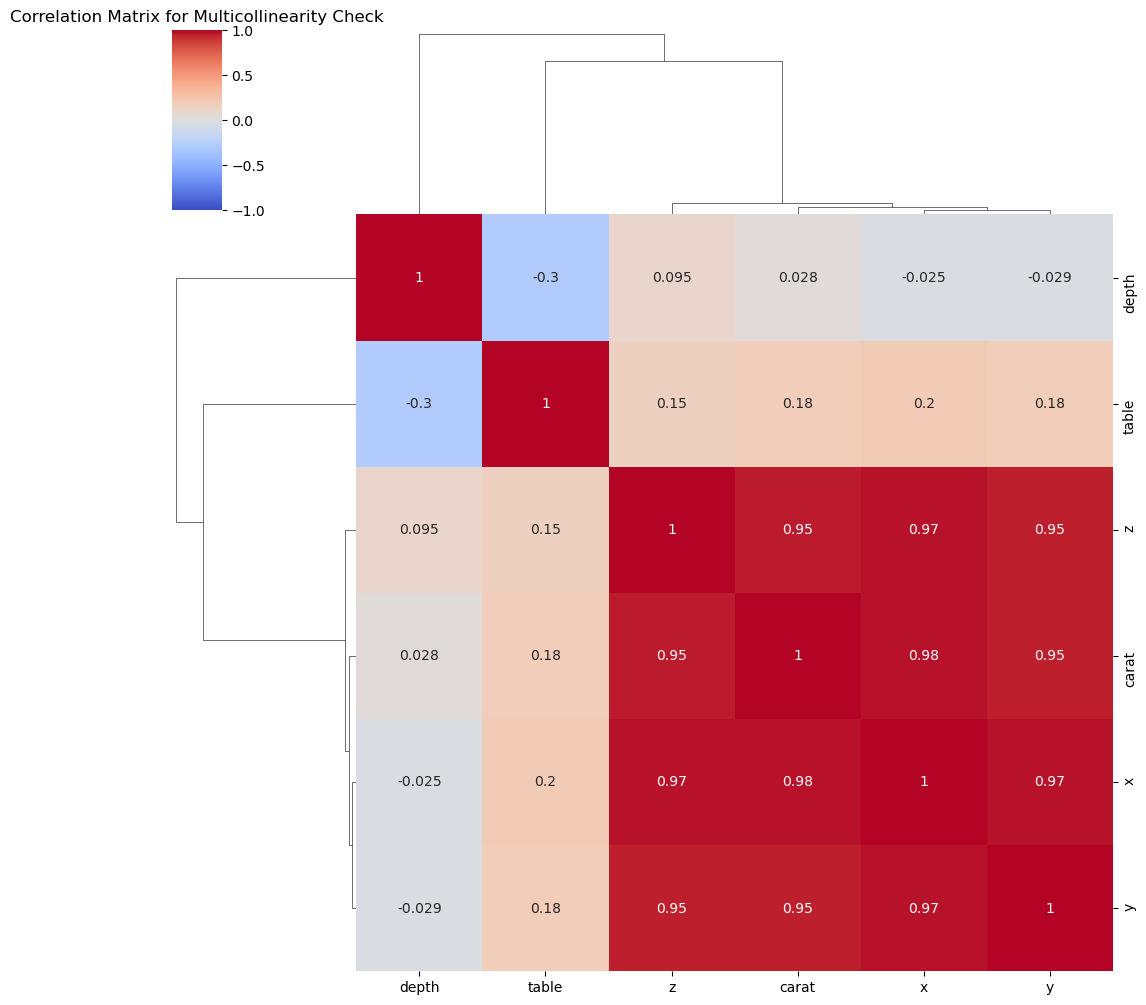

In [26]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Define the independent variables (features) and dependent variable (target)
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Fit the multiple linear regression model using scikit-learn
model = LinearRegression()
model.fit(X, y)

# Get the predicted values
predicted_values = model.predict(X)

# Get the residuals (errors)
residuals = y - predicted_values

# 1. Check Linearity with Scatter Plot
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=diamonds[col], y=y)
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.title(f'Scatter Plot of {col} vs Price')
    plt.show()

# 2. Check Homoscedasticity with Residuals Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=predicted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Homoscedasticity Check')
plt.show()

# 3. Check Multicollinearity with Correlation Matrix
corr_matrix = X.corr()
plt.figure(figsize=(8, 6))
sns.clustermap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Multicollinearity Check')
plt.show()


4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the 
performance of different regression models

In [28]:
# machine learning pipeline not covered---

5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and 
R-squared score

In [30]:
from sklearn.datasets import load_iris
data=load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df["target"]=data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [32]:
X=df.drop(columns="target")
y=df.target

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
y_predict=model.predict(X_test)
y_predict

array([-2.95157744e-01,  8.65963312e-01,  1.15762640e+00, -7.80551336e-02,
        1.84237587e+00,  1.42462099e+00,  1.77552284e+00,  1.78494798e-01,
        5.62199445e-02,  1.97122616e+00,  1.25135700e+00,  5.13160211e-02,
        1.88897202e+00,  1.28646556e+00,  1.36704552e+00,  2.33313617e-02,
        1.09182164e+00,  1.45421181e+00, -2.16024761e-02, -1.37290993e-01,
        1.28533257e+00,  1.49697167e+00,  1.48163324e+00, -4.95651057e-02,
        1.75189801e+00,  1.19928087e+00, -1.63039215e-01, -1.31970416e-03,
        1.25737454e+00,  1.65980673e+00,  1.32921161e+00,  1.92626473e+00,
        1.05014877e+00,  1.93830998e+00,  2.05620565e+00, -9.61694908e-02,
        1.20146501e+00, -1.12072104e-01,  1.29084208e+00,  1.78258598e+00,
        1.82374065e+00, -3.86022447e-02,  1.51723337e+00,  1.81000645e+00,
        1.17022204e+00])

In [36]:
model.coef_

array([-0.21379928,  0.01646584,  0.32342789,  0.50443347])

In [37]:
model.intercept_

0.3900145486192701

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9081529993900115

6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

In [40]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [41]:
X=df[["total_bill"]]
y=df[["tip"]]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [43]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [44]:
y_predict=model.predict(X_test)
y_predict

array([[1.29124525],
       [2.87227083],
       [3.65825491],
       [2.41738632],
       [3.11178967],
       [1.76122548],
       [2.11345906],
       [3.08562375],
       [2.43952672],
       [3.45697858],
       [2.20604617],
       [1.99772517],
       [3.99438638],
       [3.51937424],
       [6.09571129],
       [3.2637533 ],
       [3.33017449],
       [2.0178528 ],
       [2.2593844 ],
       [3.71763143],
       [4.0155204 ],
       [2.77163267],
       [2.62470094],
       [3.31407238],
       [2.23321848],
       [2.05408254],
       [3.0443621 ],
       [3.52641891],
       [2.8632134 ],
       [4.00746935],
       [2.29058223],
       [4.04168632],
       [2.09131867],
       [4.58815156],
       [4.4875134 ],
       [2.33285026],
       [4.12924153],
       [2.82899642],
       [2.69011575],
       [2.10641439],
       [3.40565311],
       [3.0604642 ],
       [3.24563843],
       [2.49286495],
       [3.06448973],
       [3.89777374],
       [3.40364035],
       [4.530

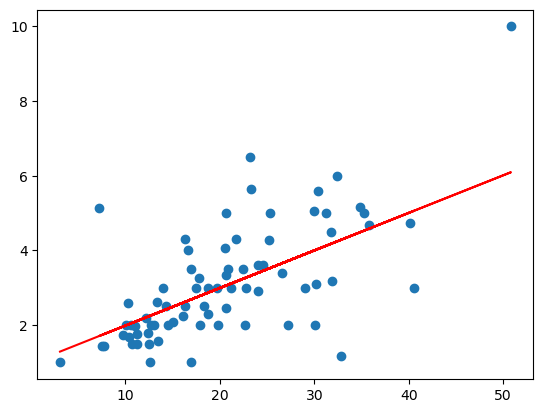

In [45]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,color="r")

8. Write a Python script that pickles a trained linear regression model and saves it to a file

In [47]:
import pickle 
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)


9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the 
regression curve.

In [49]:
from sklearn.preprocessing import PolynomialFeatures
ploy=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=ploy.fit_transform(X_train)

In [50]:
X_train_poly

array([[  48.27  , 2329.9929],
       [  44.3   , 1962.49  ],
       [  11.87  ,  140.8969],
       [  15.98  ,  255.3604],
       [  24.71  ,  610.5841],
       [  14.83  ,  219.9289],
       [  13.42  ,  180.0964],
       [  20.29  ,  411.6841],
       [  38.01  , 1444.7601],
       [  12.76  ,  162.8176],
       [  19.49  ,  379.8601],
       [  25.71  ,  661.0041],
       [  15.98  ,  255.3604],
       [   9.94  ,   98.8036],
       [  19.08  ,  364.0464],
       [  16.82  ,  282.9124],
       [  34.63  , 1199.2369],
       [  11.69  ,  136.6561],
       [  13.94  ,  194.3236],
       [  16.29  ,  265.3641],
       [  25.29  ,  639.5841],
       [  45.35  , 2056.6225],
       [  18.71  ,  350.0641],
       [  28.55  ,  815.1025],
       [  43.11  , 1858.4721],
       [  16.45  ,  270.6025],
       [  12.02  ,  144.4804],
       [  28.17  ,  793.5489],
       [  38.07  , 1449.3249],
       [  10.34  ,  106.9156],
       [  25.56  ,  653.3136],
       [  10.77  ,  115.9929],
       [

In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_poly,y_train)

LinearRegression()

In [52]:
y_poly_predict=model.predict(X_train_poly)

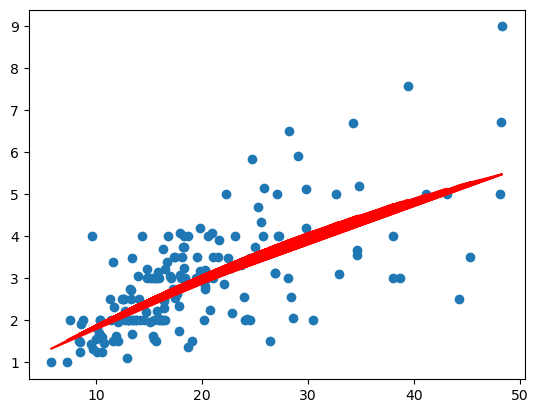

In [53]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_poly_predict,color="red")

In [54]:
from sklearn.metrics import r2_score
r2_score(y_train,y_poly_predict)

0.47207842778335585

10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

Coefficient: [5.77011339]
Intercept: [4.21509616]


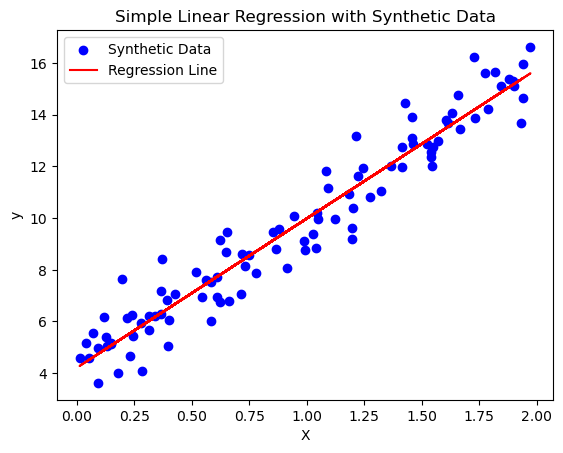

In [56]:
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 6 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

coefficient = model.coef_[0]
intercept = model.intercept_

print(f"Coefficient: {coefficient}")
print(f"Intercept: {intercept}")

# Plot the data
plt.scatter(X, y, color='blue', label='Synthetic Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression with Synthetic Data')
plt.legend()
plt.show()


11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and 
compares their performance.

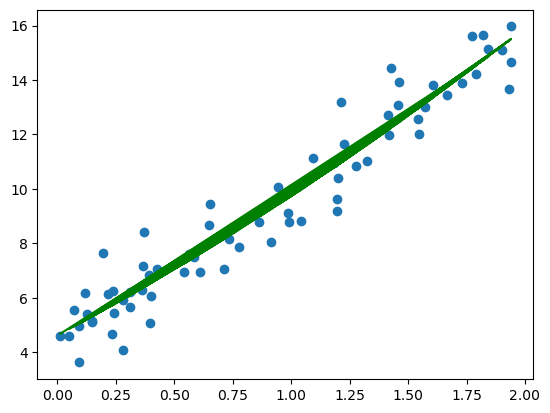

In [58]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 6 * X + np.random.randn(100, 1)

X_train,X_tesr,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)
from sklearn.preprocessing import PolynomialFeatures
model_poly=PolynomialFeatures(degree=2,include_bias=False)
X_train_poly=model_poly.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_poly,y_train)

y_predict_poly=model.predict(X_train_poly)

plt.scatter(X_train,y_train)
plt.plot(X_train,y_predict_poly,color="g")

In [59]:
X_train.shape,y_predict_poly.shape

((70, 1), (70, 1))

14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [62]:
df.sex.value_counts()
df.sex=df.sex.map({"Male":1,"Female":0}).astype("float")

In [63]:
df.smoker.value_counts()
df.smoker=df.smoker.map({"Yes":1,"No":0}).astype("float")

In [64]:
df=df.drop(columns="time")

In [65]:
df.day.value_counts()
from sklearn.preprocessing import OrdinalEncoder
one_encoder=OrdinalEncoder(categories=[["Sat","Sun","Thur","Fri",]])
df.day=one_encoder.fit_transform(df[["day"]])
df.day=df.day.astype(int)
df.day=df.day.value_counts()

In [66]:
df=df.drop(columns="day")

In [67]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
size          0
dtype: int64

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=df.columns
vif

,features
0,total_bill
1,tip
2,sex
3,smoker
4,size


In [69]:
vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
print(vif)

# so as total bill vif number more than 10 we drop it 1st ..

     features        VIF
0  total_bill  13.947517
1         tip  10.277882
2         sex   2.590789
3      smoker   1.555528
4        size  10.045585


In [70]:
df=df.drop(columns="total_bill")


In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=df.columns
vif

,features
0,tip
1,sex
2,smoker
3,size


In [72]:
vif["VIF"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
print(vif)

  features       VIF
0      tip  7.142175
1      sex  2.562064
2   smoker  1.492569
3     size  7.447310


15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

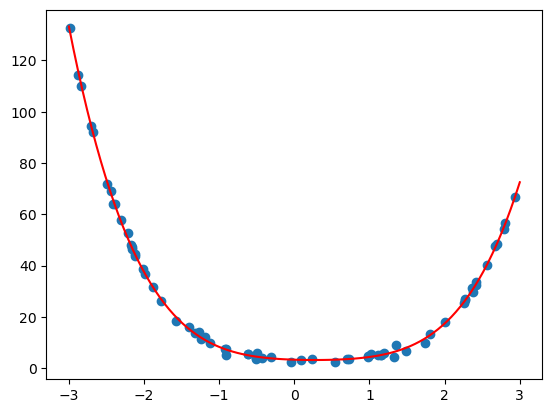

In [102]:
np.random.seed(1)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 + X**4 - X**3 + 2 * X**2 - X + 3 + np.random.randn(100, 1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import PolynomialFeatures
model_poly=PolynomialFeatures(degree=4,include_bias=False)
X_train_poly=model_poly.fit_transform(X_train)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train_poly,y_train)

X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = model_poly.transform(X_plot)

y_poly_predict=model.predict(X_plot_poly)

plt.scatter(X_train,y_train)
plt.plot(X_plot,y_poly_predict,color="r")



16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple 
linear regression model, and prints the R-squared score.

In [ ]:
np.random.seed(1)
X = 6 * np.random.rand(100, 1) 
y = 0.5 + 2 * X**2 - X + 3 + np.random.randn(100, 1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ("standard_scaler", StandardScaler()),
    ("linear_regression", LinearRegression())
])

pipeline.fit(X_train,y_train)
y_prediCT=pipeline.predict(X_test)

from sklearn.metrics import r2_score
r2_score(y_test,y_prediCT)

In [ ]:
17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the 
regression curve.

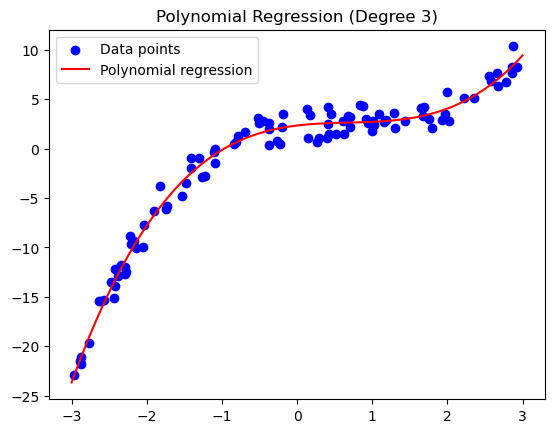

In [118]:

np.random.seed(0)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**3 - X**2 + X + 2 + np.random.randn(100, 1)

poly = PolynomialFeatures(degree=3, include_bias=False)

from sklearn.pipeline import make_pipeline
pipeline =make_pipeline(poly, LinearRegression())


pipeline.fit(X, y)


X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
y_plot = pipeline.predict(X_plot)


plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_plot, y_plot, color='red', label='Polynomial regression')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print 
the R-squared score and model coefficients

In [159]:
from  sklearn.datasets import make_classification

X,y=make_classification(n_samples=1000,n_features=5,n_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(r2)
print(model.coef_)
print(model.intercept_)

0.6031268524665407
[-0.00271941  0.13449748  0.19746294 -0.01659127 -0.02058635]
0.4953153520094716


21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using 
joblib instead of pickling.

In [166]:
import joblib

file="linera model file"
joblib.dump(model,file)

print(f"the model save as {file}")

load_model=joblib.load(file)
print(f"model loading from {file}")

# testing 
r2_score(y_test,y_pred)

the model save as linera model file
model loading from linera model file


0.6031268524665407

22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [208]:

from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer


tips = sns.load_dataset('tips')


X = tips.drop(['tip'], axis=1)
y = tips['tip']

categorical_features = ['sex', 'smoker', 'day', 'time']


preprocessor = ColumnTransformer(transformers=[
        ('cat', OneHotEncoder(), categorical_features)],
                                 remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


r2 = r2_score(y_test, y_pred)
r2


0.4875817254349353

24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset

In [259]:
np.random.seed(1)

X=np.random.rand(100,1)
y=60+X**3*5+X**2*5+X*33+np.random.randn(100,1)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso

lasso=Lasso()
param_distribution={"alpha":[1,1.2,3.3,4,5.5]}

model=RandomizedSearchCV(estimator=lasso,param_distributions=param_distribution,scoring="r2",cv=5,verbose=2)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

model.fit(X_train,y_train)

y_predict5=model.best_estimator_.predict(X_test)

print(r2_score(y_test,y_predict5))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ............................................alpha=1; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=1.2; total time=   0.0s
[CV] END ..........................................alpha=3.3; total time=   0.0s
[CV] END ........................................

C:\Users\atrey\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


25.write a python scipts that compares polynomial regression models of different degrees and prints the R-squared score for each.

In [278]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

def evaluation_poly_regression(degree):
    model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
    model.fit(X_train,y_train)
    y_pred10=model.predict(X_test)
    r2=r2_score(y_test,y_pred10)
    return r2

degrees=[1,2,3,4,5]
total=[]
for i in degrees:
    ans=evaluation_poly_regression(i)
    total.append(ans)
    print(total)


[0.9862773249790867]
[0.9862773249790867, 0.9934642573336273]
[0.9862773249790867, 0.9934642573336273, 0.9934747345023185]
[0.9862773249790867, 0.9934642573336273, 0.9934747345023185, 0.993510020284505]
[0.9862773249790867, 0.9934642573336273, 0.9934747345023185, 0.993510020284505, 0.9935297359397713]
